## #1: Scikit Learn Decision Tree Visualization

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")
test= pd.read_csv('test.csv')

In [38]:
features_and_survival = ['Age', 'Pclass', 'Sex', 'Fare', 'Survived']
categorical_features = ['Pclass', 'Sex']
cleanedTrain = train[features_and_survival].dropna()
for colName in categorical_features:
    dummyCols = pd.get_dummies(cleanedTrain[colName], drop_first=True)
    cleanedTrain = cleanedTrain.drop(columns = [colName])
    cleanedTrain = pd.concat([cleanedTrain, dummyCols], axis = 1)
X_train = cleanedTrain.drop(columns = ['Survived']).values
y_train = cleanedTrain['Survived'].values

,Age,Fare,Survived,2,3,male
0,22.0,7.2500,0,0,1,1
1,38.0,71.2833,1,0,0,0
2,26.0,7.9250,1,0,1,0
3,35.0,53.1000,1,0,0,0
4,35.0,8.0500,0,0,1,1


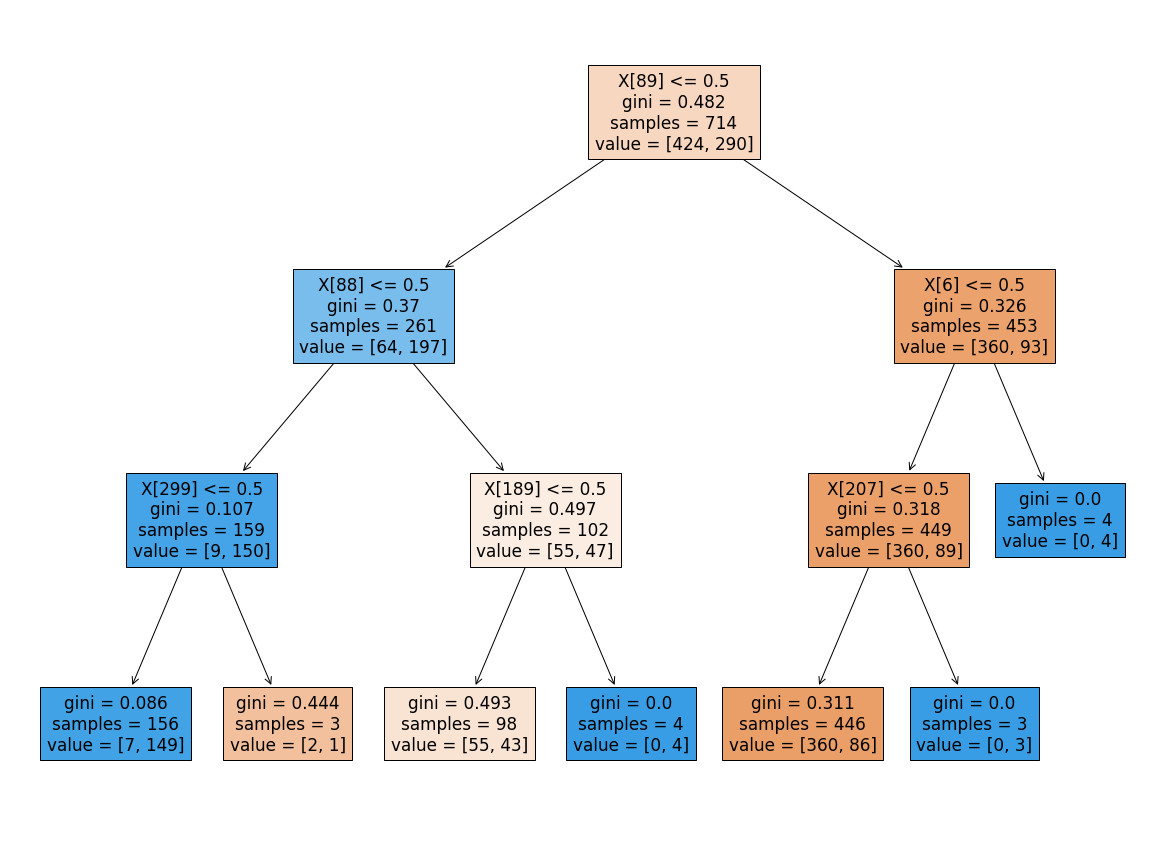

In [43]:
plt.figure(figsize = (20, 15))
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.show()

In [44]:
sum(clf.predict(X_train) == y_train)/len(y_train)

0.8081232492997199

## #2: dtreeviz Visualization Package

In [47]:
from sklearn.datasets import *
clas = tree.DecisionTreeClassifier(max_depth=2)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked')  # barstackes is default
viz

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', 'C:\\Users\\iyerr\\AppData\\Local\\Temp\\DTreeViz_20160.svg', 'C:/Users/iyerr/AppData/Local/Temp\\DTreeViz_20160'], make sure the Graphviz executables are on your systems' PATH

In [45]:
from dtreeviz.trees import *
clas = DecisionTreeClassifier(max_depth=2)  
clas.fit(X_train, y_train)


viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked')  # barstackes is default

Exception: class_names must be dict or sequence, not NoneType